In [1]:
import sys
import os
sys.path.append("../../TychePlot/")
from OLEDPlot import OLEDPlot
from Filereader import fileToNpArray,npArrayToFile

In [2]:
#files=['plqy/laser_only', 'plqy/sample', 'plqy/sample_out_of_the_beam']
files=['plqy/0.01_exposure_time_2020-09-02_17-35-17_onlylaser', 'plqy/0.01_exposure_time_2020-09-02_17-26-26_sample', 'plqy/0.01_exposure_time_2020-09-02_17-32-35_sampleoutside']

In [5]:
spectra_offset=[350,-200]
laser_thresh=400

In [6]:
file_format={
                "skiplines":1,
                "fileEnding":".tsv",
                "separator":"\t",
                "commaToPoint":True,
            }
clbr_format={
                "skiplines":1,
                "fileEnding":".clbr",
                "separator":"\t",
                "commaToPoint":True,
            }

In [7]:
spectra=[]
for file in files:
    spectra.append(fileToNpArray(file, **file_format)[0])

In [8]:
calib_vec=fileToNpArray("plqy/calib/2020-09-04_13-56-01___CCD__Calibration", **clbr_format)[0][:,1][spectra_offset[0]:spectra_offset[1]]

In [9]:
#calib_vec[:100]=calib_vec[:100]*10

In [10]:
x=spectra[0][:,0][spectra_offset[0]:spectra_offset[1]]
laser=spectra[0][:,1][spectra_offset[0]:spectra_offset[1]]*calib_vec
sample=spectra[1][:,1][spectra_offset[0]:spectra_offset[1]]*calib_vec
laser_sample=spectra[2][:,1][spectra_offset[0]:spectra_offset[1]]*calib_vec

In [11]:
import matplotlib.pyplot as plt

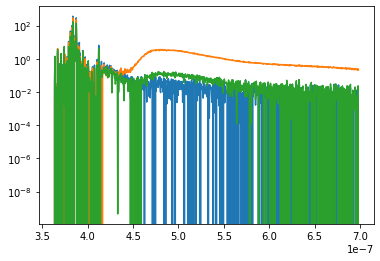

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(x, laser, x, sample, x, laser_sample)
plt.yscale("log")

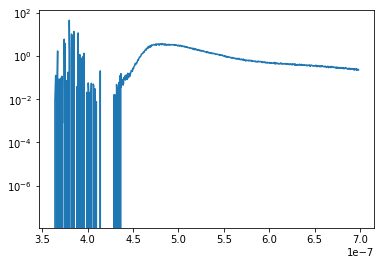

In [13]:
plt.clf()
plt.plot(x, sample-laser)
plt.yscale("log")

In [14]:
neg_part=[[wavelength,sample_ele-laser_ele] for wavelength,sample_ele,laser_ele in zip(x,sample,laser) if sample_ele-laser_ele <0]
pos_part=[[wavelength,sample_ele-laser_ele] for wavelength,sample_ele,laser_ele in zip(x,sample,laser) if sample_ele-laser_ele >0]

In [15]:
pos_part_corr=[val for val in pos_part if val[0] > laser_thresh*10**-9]

In [16]:
hc=OLEDPlot.h*OLEDPlot.c

In [17]:
neg_phot_p_channel_sec=np.asarray([(neg_val[1]*neg_val[0])/hc for neg_val in neg_part])
pos_phot_p_channel_sec=np.asarray([(pos_val[1]*pos_val[0])/hc for pos_val in pos_part_corr])

In [18]:
absorbed=sum(abs(neg_phot_p_channel_sec))
emitted=sum(pos_phot_p_channel_sec)

In [19]:
emitted/absorbed

3.7491473815316807

In [18]:
### PAPER CALCS

In [39]:
#L_a_spectral=[(wavelength,val) for wavelength,val in zip(x,laser) if wavelength <= laser_thresh*10**-9]
#L_b_spectral=[(wavelength,val) for wavelength,val in zip(x,laser_sample) if wavelength <= laser_thresh*10**-9]
#L_c_spectral=[(wavelength,val) for wavelength,val in zip(x,sample) if wavelength <= laser_thresh*10**-9]
#P_a_spectral=[(wavelength,val) for wavelength,val in zip(x,laser_sample) if wavelength > laser_thresh*10**-9]
#P_b_spectral=[(wavelength,val) for wavelength,val in zip(x,laser_sample) if wavelength > laser_thresh*10**-9]
#P_c_spectral=[(wavelength,val) for wavelength,val in zip(x,sample) if wavelength > laser_thresh*10**-9]

In [54]:
L_a_spectral=[(wavelength,val) for wavelength,val in zip(x,laser) if wavelength <= laser_thresh*10**-9 and val >=0 and val <=500]
L_b_spectral=[(wavelength,val) for wavelength,val in zip(x,laser_sample) if wavelength <= laser_thresh*10**-9 and val >=0 and val <=500]
L_c_spectral=[(wavelength,val) for wavelength,val in zip(x,sample) if wavelength <= laser_thresh*10**-9 and val >=0 and val <=500]
P_a_spectral=[(wavelength,val) for wavelength,val in zip(x,laser_sample) if wavelength > laser_thresh*10**-9 and val >=0]
P_b_spectral=[(wavelength,val) for wavelength,val in zip(x,laser_sample) if wavelength > laser_thresh*10**-9 and val >=0]
P_c_spectral=[(wavelength,val) for wavelength,val in zip(x,sample) if wavelength > laser_thresh*10**-9 and val >=0]

In [55]:
L_a_p_channel_sec=np.asarray([(val[1]*val[0])/hc for val in L_a_spectral])
L_b_p_channel_sec=np.asarray([(val[1]*val[0])/hc for val in L_b_spectral])
L_c_p_channel_sec=np.asarray([(val[1]*val[0])/hc for val in L_c_spectral])
P_a_p_channel_sec=np.asarray([(val[1]*val[0])/hc for val in P_a_spectral])
P_b_p_channel_sec=np.asarray([(val[1]*val[0])/hc for val in P_b_spectral])
P_c_p_channel_sec=np.asarray([(val[1]*val[0])/hc for val in P_c_spectral])

In [56]:
L_a=sum(L_a_p_channel_sec)
L_b=sum(L_b_p_channel_sec)
L_c=sum(L_c_p_channel_sec)
P_a=sum(P_a_p_channel_sec)
P_b=sum(P_b_p_channel_sec)
P_c=sum(P_c_p_channel_sec)

In [57]:
# 3 Step
(P_c-(L_c/L_b)*P_b)/(L_a*(1-L_c/L_b))

-1.1857126012195986

In [58]:
# 2 Step
(P_c)/(L_a-L_c)

4.2425412938326685

In [59]:
L_c/L_b

1.6635994345311502